# Explore Entur Vehicle Monitoring

In [1]:
import pandas as pd

from spartid_pubtransport import vehiclemonitoring

## Use internal function to get geopandas GeoDataFrame

In [2]:
gdf = vehiclemonitoring.get_vehicles()
gdf.dtypes

/home/knuthp/src/spartid-pubtransport/spartid_pubtransport/vehiclemonitoring.py:43: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  ValidUntilTime=pd.to_datetime(


RecordedAtTime                 datetime64[ns, UTC+01:00]
ValidUntilTime                                    object
DataFrameRef                             string[pyarrow]
DatedVehicleJourneyRef                   string[pyarrow]
LineRef                                  string[pyarrow]
VehicleMode                              string[pyarrow]
OperatorRef                              string[pyarrow]
VehicleFeatureRef                        string[pyarrow]
OriginRef                                string[pyarrow]
OriginName                               string[pyarrow]
DestinationRef                           string[pyarrow]
DestinationName                          string[pyarrow]
Monitored                                string[pyarrow]
InCongestion                             string[pyarrow]
DataSource                               string[pyarrow]
Bearing                                   float[pyarrow]
Delay                                    timedelta64[ns]
VehicleStatus                  

In [3]:
bins = [
    pd.Timedelta(days=-1),
    pd.Timedelta(minutes=0),
    pd.Timedelta(minutes=5),
    pd.Timedelta(minutes=10),
    pd.Timedelta(minutes=20),
    pd.Timedelta(minutes=30),
    pd.Timedelta(days=4),
]

labels = ["unreasonable", "0-5min", "5-10min", "10-20min", "20-30min", "30min+"]

one_hour = pd.Timestamp.now(tz="Europe/Berlin") - pd.Timedelta(hours=3)
print(one_hour)
(
    gdf.assign(
        delay_bin=pd.cut(
            gdf["Delay"], bins, labels=labels
        ),  # .astype(str).fillna("Unknown"),
        delay_seconds=gdf["Delay"].dt.seconds,
    )
    # [["RecordedAtTime", "ValidUntilTime", "Delay", "delay_seconds", "delay_bin"]]
    .query("RecordedAtTime < @one_hour")
    .sort_values("Delay")
)

2024-03-30 18:53:50.151653+01:00


RecordedAtTime             ValidUntilTime  \
1756 2024-03-27 09:05:05+01:00  9999-12-31 23:59:59+01:00   
479  2024-03-27 07:55:28+01:00  9999-12-31 23:59:59+01:00   
540  2024-03-25 08:18:04+01:00  9999-12-31 23:59:59+01:00   
644  2024-03-30 16:29:29+01:00  2024-03-30 22:29:29+01:00   
640  2024-03-30 16:31:30+01:00  2024-03-30 22:31:30+01:00   
...                        ...                        ...   
1073 2024-03-30 16:56:12+01:00  2024-03-30 22:56:12+01:00   
1996 2024-03-27 11:46:04+01:00  9999-12-31 23:59:59+01:00   
424  2024-03-30 16:11:41+01:00  9999-12-31 23:59:59+01:00   
1748 2024-03-30 16:18:53+01:00  2024-03-30 22:18:53+01:00   
514  2024-03-27 15:56:12+01:00  9999-12-31 23:59:59+01:00   

             DataFrameRef                       DatedVehicleJourneyRef  \
1756  2024-03-27T04:00:00                              184:1:8552:1012   
479   2024-03-27T04:00:00                              184:1:3705:1004   
540   2024-03-25T04:00:00                              184:1:3705:1004   
644            2024-03-30               BOR:DeadRun:240305085484457_33   
640            2024-03-30               BOR:DeadRun:240304161979640_33   
...                   ...                                          ...   
1073           2024-03-30   TRO:ServiceJourney:42_240305165465994_7029   
1996  2024-03-27T04:00:00                              184:1:8871:2009   
424   2024-03-30T04:00:00                              184:1:8202:3002   
1748           2024-03-30  TRO:ServiceJourney:450_240221112276872_7003   
514   2024-03-27T04:00:00                              184:1:8200:2001   

             LineRef VehicleMode       OperatorRef     VehicleFeatureRef  \
1756   NOR:Line:8552     unknown              <NA>                  <NA>   
479    NOR:Line:3705     unknown              <NA>                  <NA>   
540    NOR:Line:3705     unknown              <NA>                  <NA>   
644             <NA>         bus  OST:Operator:923  SignageModeAutomatic   
640             <NA>         bus  OST:Operator:923  SignageModeAutomatic   
...              ...         ...               ...                   ...   
1073   TRO:Line:1_42         bus  TRO:Operator:960  SignageModeAutomatic   
1996   NOR:Line:8871     unknown              <NA>                  <NA>   
424    NOR:Line:8202     unknown              <NA>                  <NA>   
1748  TRO:Line:1_450         bus  TRO:Operator:960  SignageModeAutomatic   
514    NOR:Line:8200     unknown              <NA>                  <NA>   

                        OriginRef           OriginName  ...  \
1756                         <NA>                 <NA>  ...   
479                          <NA>                 <NA>  ...   
540                          <NA>                 <NA>  ...   
644   NSR:Quay:BOR:Quay:101990313       Garasje Halden  ...   
640   NSR:Quay:BOR:Quay:101990323       Garasje Halden  ...   
...                           ...                  ...  ...   
1073               NSR:Quay:90847  Skattøra Borettslag  ...   
1996                         <NA>                 <NA>  ...   
424                          <NA>                 <NA>  ...   
1748               NSR:Quay:88852    Tromsø Prostneset  ...   
514                          <NA>                 <NA>  ...   

     DestinationAimedArrivalTime ItemIdentifier DeparturePlatformName  \
1756                        <NA>           <NA>                  <NA>   
479                         <NA>           <NA>                  <NA>   
540                         <NA>           <NA>                  <NA>   
644                         <NA>           <NA>                  <NA>   
640                         <NA>           <NA>                  <NA>   
...                          ...            ...                   ...   
1073                        <NA>           <NA>                  <NA>   
1996                        <NA>           <NA>                  <NA>   
424                         <NA>           <NA>                  <N

In [10]:
# Skip not json serializable columns
show_coluns = (
    gdf.dtypes.astype(str)
    .to_frame("dtype")
    .query("~dtype.str.contains('time')")
    .query("~dtype.str.contains('object')")
    .index
)
show_coluns

Index(['DataFrameRef', 'DatedVehicleJourneyRef', 'LineRef', 'VehicleMode',
       'OperatorRef', 'VehicleFeatureRef', 'OriginRef', 'OriginName',
       'DestinationRef', 'DestinationName', 'Monitored', 'InCongestion',
       'DataSource', 'Bearing', 'VehicleStatus', 'VehicleRef',
       'IsCompleteStopSequence', 'Longitude', 'Latitude', 'StopPointRef',
       'Order', 'StopPointName', 'VehicleAtStop', 'DestinationDisplay',
       'Occupancy', 'VehicleMonitoringRef', 'DirectionRef',
       'PublishedLineName', 'VehicleJourneyRef', 'VisitNumber',
       'AimedArrivalTime', 'ExpectedArrivalTime', 'ArrivalStatus',
       'ArrivalBoardingActivity', 'AimedDepartureTime',
       'ExpectedDepartureTime', 'DepartureBoardingActivity',
       'ActualArrivalTime', 'DestinationAimedArrivalTime', 'ItemIdentifier',
       'DeparturePlatformName', 'OriginAimedDepartureTime', 'Velocity',
       'ActualDepartureTime', 'BlockRef', 'geometry'],
      dtype='object')

In [11]:
gdf.astype("str")

RecordedAtTime                    ValidUntilTime  \
0            2024-03-30 18:37:18+01:00         2024-03-31 00:37:18+01:00   
1     2024-03-30 21:52:57.829000+01:00  2024-03-30 22:02:57.829000+01:00   
2            2024-03-30 21:53:36+01:00         2024-03-31 03:53:36+02:00   
3            2024-03-30 19:52:55+01:00         2024-03-31 01:52:55+01:00   
4            2024-03-30 21:53:36+01:00         2024-03-31 03:53:36+02:00   
...                                ...                               ...   
2190  2024-03-30 21:53:42.649000+01:00  2024-03-30 22:03:42.649000+01:00   
2191         2024-03-30 16:45:54+01:00         2024-03-30 22:45:54+01:00   
2192         2024-03-30 16:06:04+01:00         2024-03-30 22:06:04+01:00   
2193  2024-03-30 11:50:05.377000+01:00  2024-03-30 23:50:05.377000+01:00   
2194         2024-03-30 16:22:40+01:00         2024-03-30 22:22:40+01:00   

     DataFrameRef                             DatedVehicleJourneyRef  \
0      2024-03-30                                    16771701_177298   
1      2024-03-30                    NSB:ServiceJourney:331_173577-R   
2      2024-03-30                                    16771123_177295   
3      2024-03-30        TRO:ServiceJourney:100_240305165461185_6003   
4      2024-03-30                                    16770393_177280   
...           ...                                                ...   
2190   2024-03-30  VYX:ServiceJourney:91625fa5506c22d2e30f1b13e80...   
2191   2024-03-30                                    16813752_171529   
2192   2024-03-30                                    16813737_171529   
2193   2024-03-30                       FIN:ServiceJourney:2350_2_27   
2194   2024-03-30                                    16883895_172394   

             LineRef VehicleMode       OperatorRef     VehicleFeatureRef  \
0         SKY:Line:3         bus   SKY:Operator:44  SignageModeAutomatic   
1       NSB:Line:R10        rail              <NA>                  <NA>   
2         SKY:Line:5         bus   SKY:Operator:44  SignageModeAutomatic   
3     TRO:Line:1_100         bus  TRO:Operator:961  SignageModeAutomatic   
4         SKY:Line:3         bus   SKY:Operator:44  SignageModeAutomatic   
...              ...         ...               ...                   ...   
2190      VYX:Line:5     unknown              <NA>                  <NA>   
2191    SKY:Line:326         bus   SKY:Operator:12  SignageModeAutomatic   
2192    SKY:Line:325         bus   SKY:Operator:12  SignageModeAutomatic   
2193   FIN:Line:2350       ferry              <NA>                  <NA>   
2194    SKY:Line:620         bus   SKY:Operator:38  SignageModeAutomatic   

              OriginRef            OriginName  ... DepartureBoardingActivity  \
0     NSR:Quay:12011356      Støbotn snuplass  ...                      <NA>   
1                  <NA>                  <NA>  ...                      <NA>   
2     NSR:Quay:12016437               Sletten  ...                      <NA>   
3        NSR:Quay:89249                   UNN  ...                      <NA>   
4     NSR:Quay:12011357               Støbotn  ...                      <NA>   
...                 ...                   ...  ...                       ...   
2190               <NA>                  <NA>  ...                      <NA>   
2191  NSR:Quay:12644914        Mastrevik torg  ...                      <NA>   
2192  NSR:Quay:12604329         Manger senter  ...                      <NA>   
2193     NSR:Quay:98145                 Måsøy  ...                      <NA>   
2194  NSR:Quay:12197964  Svortland terminal E  ...                      <NA>   

     ActualArrivalTime DestinationAimedArrivalTime ItemIdentifier  \
0                 <NA>                        <NA>           <NA>   
1                 <NA>                        <NA>           <NA>   
2                 <NA>                        <NA>           <NA>   
3                 <NA>                        <NA>           <NA>   
4                 <NA>     

In [12]:
gdf["VehicleMode"].value_counts()

VehicleMode
bus        1180
unknown     880
ferry        82
rail         53
Name: count, dtype: int64[pyarrow]

In [13]:
gdf[show_coluns].explore(cmap="Blues")

<Axes: xlabel='VehicleMode'>

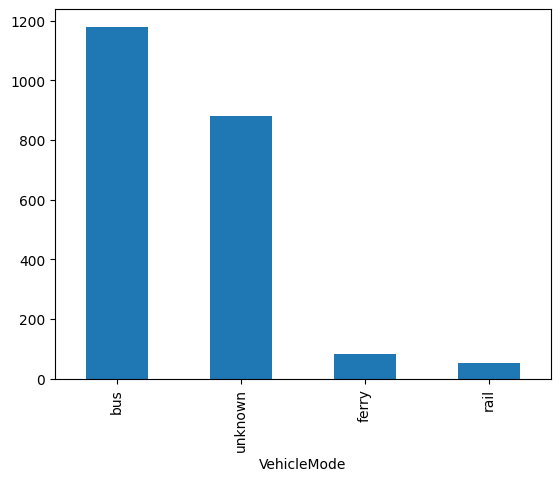

In [8]:
gdf["VehicleMode"].value_counts().plot.bar()

<Axes: xlabel='DataSource'>

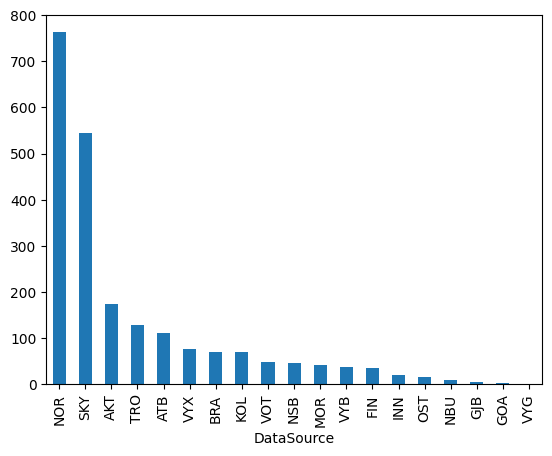

In [9]:
gdf["DataSource"].value_counts().plot.bar()